# HUMAN RESOURCE ANALYTICS: AN EXPLORATORY DATA ANALYSIS

Its important for companies to prevent important employees from leaving the company, when this happens, the employers need to ask themselves reason for this.
The Dataset is from Kaggle and the focus is to understand why the best and most experienced employees are leaving the company. By explroationof this data set its possible to extract good insigts of problems that Humnan resource deal with daily. 
This dataset contains 14999 objects and 10 attributes described below:

    Variables/Descriptions
__________________________________________________________________

        satisfaction_level    |   Satisfaction Level
        last_evaluation       |   Last evaluation
        number_project        |   Number of projects
        average_montly_hours  |   Average monthly hours
        time_spend_company    |   Time spent at the company
        Work_accident         |   Whether they have had a work accident
        left                  |   Whether the employee has left
        promotion_last_5years |   Whether had a promotion in the last 5 years
        sales                 |   Departments (column sales)
        salary                |   Salary

## 1. Libraries and Dataset

In [1]:
#import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#Load the Dataset
df = pd.read_csv('HR_comma_sep.csv')

In [3]:
#The first 5 entries of the Dataset
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
#Attributes of the Dataset

print("These are the datatypes of the Dataset:- ")
print(df.info())
print('**************************************************************')

print('These are the columns in the Dataset:-')
print(df.columns)
print('**************************************************************')

#Statistical Information on the dataset
print(df.describe())
print('**************************************************************')

print('The percentage of null values in the dataset:- ')
null_mask = df.isnull()
null_percent = null_mask.mean()
print(null_percent)

print ('The dataset has no missing values:- hence no need for imputation')

These are the datatypes of the Dataset:- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
**************************************************************
These are the columns in the Dataset:-
Index(['satisfaction_level', 'last_evaluation', 'number_

**Results of Descriptive Analysis:**
* Approximately 24% of the employees have left the company.
* The satisfaction level is around 62% and performance is around 72%.
* Employees work in average on 4 projects with 200 hours worked per month,

**Next steps based on the Data information above:**
* Change the column name 'Sales' to 'Department'
* Convert the Column Salariesfrom categorical variable to numerical Variable.

In [5]:
#What are the elements in the salary variables
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [6]:
#Rename the Column sales to department
df.rename(columns={'sales' :'department'}, inplace=True)

#Convert salary varibale to numeric
df['salary'] = df['salary'].map({'low':1,'medium':2,'high':3})

## 2. Exploratory Data Analysis

##### 2.1 How many employees works in each department?

In [7]:
print(df['department'].value_counts())

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64


##### 2.2 How many employees per salary range?

In [8]:
salary_counts = df['salary'].value_counts(normalize=True)
print(salary_counts)

1    0.487766
2    0.429762
3    0.082472
Name: salary, dtype: float64


**Inference: 48% of the employees earn low while 8% of the employees have a high incomes.**

##### 2.3 How many employees per salary range and department?

In [9]:
table = df.pivot_table(values="satisfaction_level", index="department", columns="salary",aggfunc=np.count_nonzero)
table

salary,1,2,3
department,,,
IT,609,535,83
RandD,364,372,51
accounting,358,335,74
hr,335,359,45
management,180,225,225
marketing,402,376,80
product_mng,451,383,68
sales,2099,1772,269
support,1146,942,141


<AxesSubplot:>

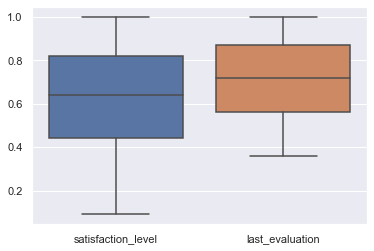

In [10]:
sns.boxplot(data=df[['satisfaction_level','last_evaluation']])

**The satisfaction level of the employees is between 48% and 82% while the performance as per the last evaluation is slightly above 50% to somewhere close to 90%.**

<AxesSubplot:>

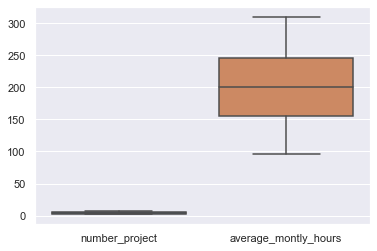

In [11]:
sns.boxplot(data=df[['number_project','average_montly_hours']])

**The Average monthly hours spent on project is between 150 to 250 hours per month, while the number of projects
per month is say 4, from the statistical descriotion done earlier.**

<AxesSubplot:>

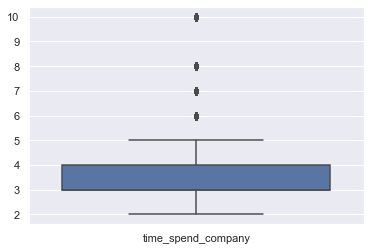

In [12]:
sns.boxplot(data=df[['time_spend_company']])

**The variable time spend_in_the_company seems to be having outliers. Some employees seems to have been with the 
company for 10 yrs, while majority of the employees have been with the company between 3 or 4 years.**

## 3. Correlation Analysis

Correlation describes the relationship between two variables.

In [13]:
corr = df.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000


C:\Users\Ochieng\AppData\Local\Temp/ipykernel_15084/2050151601.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


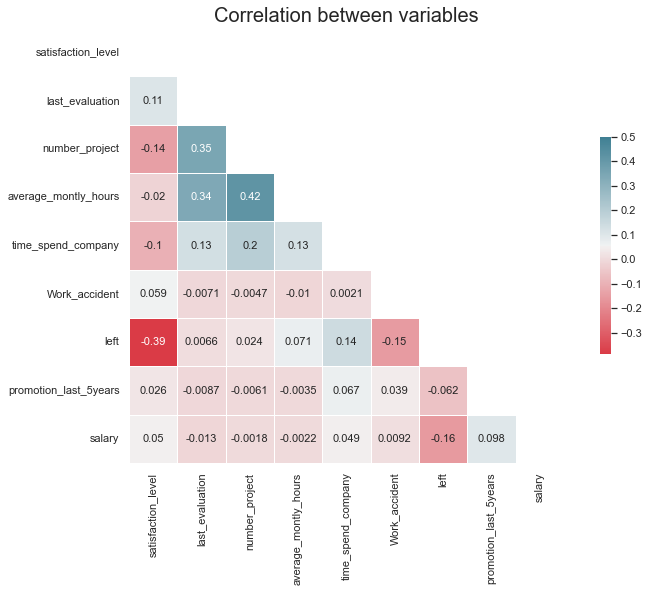

In [14]:
#Lets plot the above table for clear analysis
sns.set(style='white')

mask = np.zeros_like(corr, dtype=np.bool)

mask[np.triu_indices_from(mask)] = True

# Inserir a figura
f, ax = plt.subplots(figsize=(13,8))

cmap = sns.diverging_palette(10,220, as_cmap=True)

#Desenhar o heatmap com a máscara
ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax= .5, annot=True, annot_kws= {'size':11}, square=True, xticklabels=True, yticklabels=True, linewidths=.5, 
           cbar_kws={'shrink': .5}, ax=ax)
ax.set_title('Correlation between variables', fontsize=20);

## 4. Hypothesis

#### 4.1 How many employees left the company?

In [15]:
print(df['left'].value_counts()[1],"employees left the company")

3571 employees left the company


C:\Users\Ochieng\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


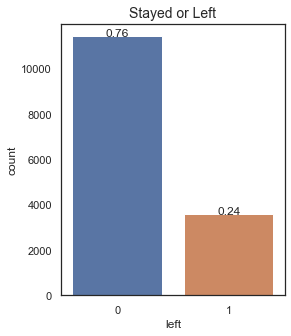

In [16]:
#Lets plot the percentage of employees that left and those that satyed in the company
plt.figure(figsize=(4,5))
ax = sns.countplot(df.left)
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.title('Stayed or Left', fontsize=14);

##### Hypotesis 1: Salary is the reason why employees left the company.

C:\Users\Ochieng\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


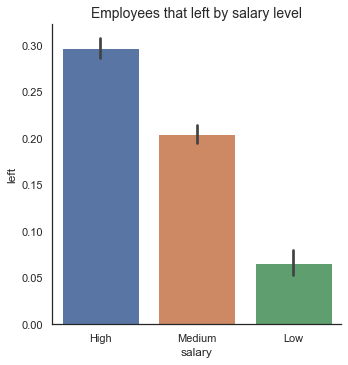

In [17]:
j = sns.factorplot(x='salary', y='left', kind='bar', data=df)
plt.title('Employees that left by salary level', fontsize=14)
j.set_xticklabels(['High', 'Medium', 'Low']);

C:\Users\Ochieng\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Ochieng\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


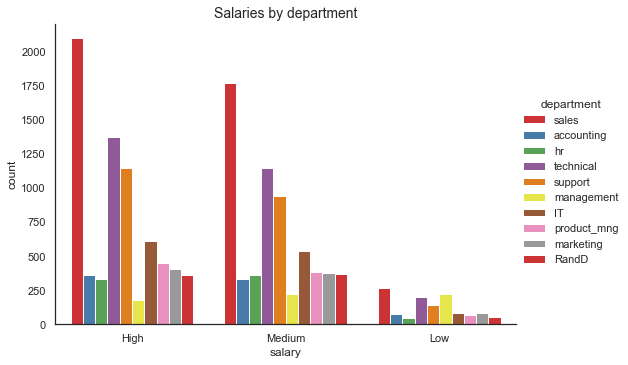

In [18]:
h = sns.factorplot(x = 'salary', hue='department', kind ='count', size = 5,aspect=1.5, data=df, palette='Set1' )
plt.title("Salaries by department", fontsize=14)
h.set_xticklabels(['High', 'Medium', 'Low']);

**Inferences:**

      *Most employees of the sales department have low or medium salaries, this may be due that some companies the sales commission is paid separately.

       *Technical department is the second place where most of the employees receives low and medium salaries.

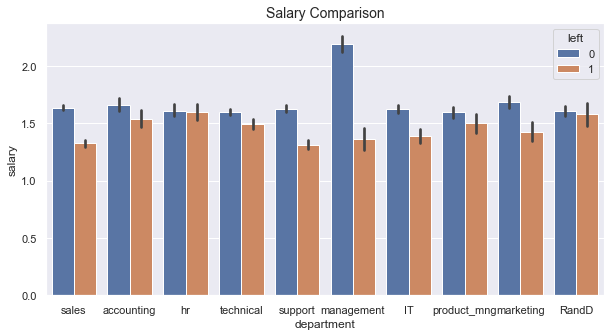

In [19]:
sns.set()
plt.figure(figsize=(10,5))
sns.barplot(x='department', y='salary', hue='left', data=df)
plt.title('Salary Comparison', fontsize=14);

In the graph Above(Salary Comparison)

    * The management department has the highest difference between the salary of the employees who stayed and those that left.
    * Its not possoble to see a huge difference in other departments.
    
**CONCLUSION: Hypothesis 1, looks very weak to be the reason why the employees left the company**

##### Hypotesis 2: Its a Dangerous Job: Employees leave the company because work is not safe.

C:\Users\Ochieng\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


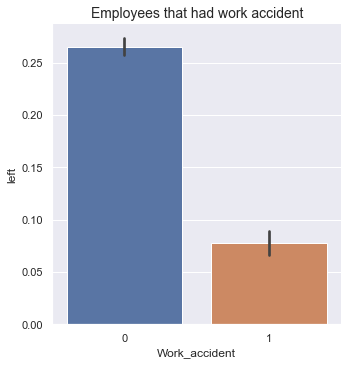

In [20]:
sns.factorplot(x='Work_accident', y='left', kind='bar', data=df)
plt.title('Employees that had work accident', fontsize=14);

In [21]:
print(df.Work_accident.sum())
print(df.Work_accident.mean())
print((df[df['left']==1]['Work_accident']).sum())

2169
0.1446096406427095
169


**About 14% of the employees had a work accident, although of the high number only of accidents only 169 employees data left the company had work a accident. Then this hypothesis is discarded.**

##### Hypothesis 3: Is the company a good place to grow professionally?

C:\Users\Ochieng\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


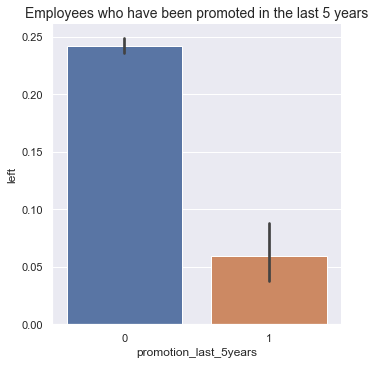

In [22]:
sns.factorplot(x='promotion_last_5years', y='left', kind='bar', data=df)
plt.title('Employees who have been promoted in the last 5 years', fontsize=14);

In [23]:
print(df.promotion_last_5years.sum())
print(df.promotion_last_5years.mean())

319
0.021268084538969265


**In the last five years only 319 employees had promotion, this is equivalent to 2% of all employees. This may be a problem because if it is difficult to get promoted many employees become unmotivated and start looking for a new job.**

#### Years in the Company

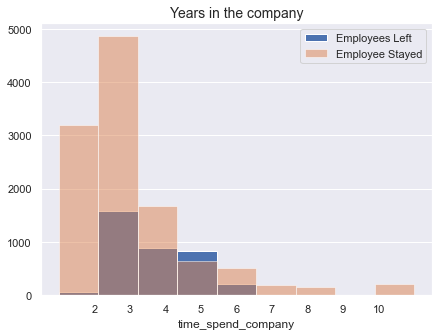

In [24]:
plt.figure(figsize =(7,5))
bins = np.linspace(1.0, 11,10)
plt.hist(df[df['left']==1]['time_spend_company'], bins=bins, alpha=1, label='Employees Left')
plt.hist(df[df['left']==0]['time_spend_company'], bins=bins, alpha = 0.5, label = 'Employee Stayed')
plt.grid(axis='x')
plt.xticks(np.arange(2,11))
plt.xlabel('time_spend_company')
plt.title('Years in the company', fontsize=14)
plt.legend(loc='best');

**From the graph above, we can identify an important characteristic;**
 1. Employees with 7 or more years didn't leave, maybe because witht the passing of the years they are more comfortable and not so interested in looking for new challenges in other companies.
 2. The problem starts when the employees have more than 3 years and gets wors when they achieve 5 years.
 3. Its too early to say rhat the difficult to get promoted is the main reason for leaving the company,but more research is needed.

#### Performance Analysis


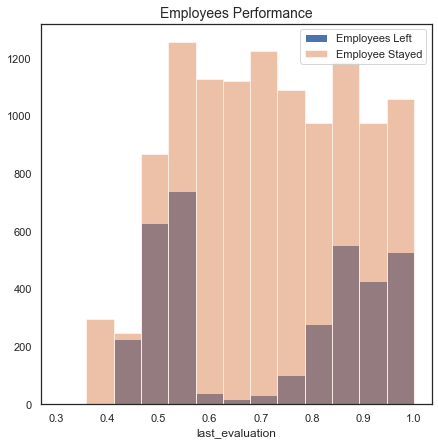

In [34]:
plt.figure(figsize =(7,7))
bins = np.linspace(0.305, 1.0001, 14)
plt.hist(df[df['left']==1]['last_evaluation'], bins=bins, alpha=1, label='Employees Left')
plt.hist(df[df['left']==0]['last_evaluation'], bins=bins, alpha = 0.5, label = 'Employee Stayed')
plt.title('Employees Performance', fontsize=14)
plt.xlabel('last_evaluation')
plt.legend(loc='best');

**There are 2 distincts groups of employees. A group with poor performance and other with high performance employees. It's natural that employees that don't work well leave the company, but the main problem is that the high performance employees are leaving too and it's necessary to understand why.**

poor_performance_left: 1531
poor_performance_stayed: 36


high_performance_left: 47
high_performance_stayed 889


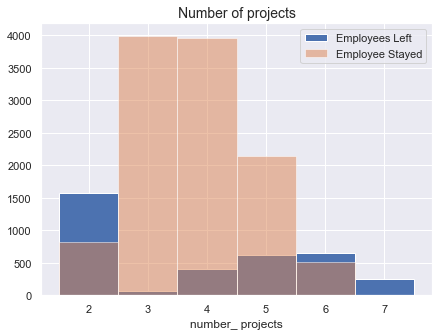

In [26]:
poor_performance_left = df[(df.last_evaluation <= 0.62) & (df.number_project == 2) & (df.left == 1)]
print('poor_performance_left:',len(poor_performance_left))

poor_performance_stayed = df[(df.last_evaluation > 0.62) & (df.number_project == 2) & (df.left == 1)]
print('poor_performance_stayed:',len(poor_performance_stayed))

print('\n')

high_performance_left= df[(df.last_evaluation <= 0.62) & (df.number_project >=5) & (df.left == 1)]
high_performance_stayed= df[(df.last_evaluation > 0.8) & (df.number_project >=5) & (df.left == 0)]
print('high_performance_left:',len(high_performance_left))
print('high_performance_stayed', len(high_performance_stayed))

plt.figure(figsize =(7,5))
bins = np.linspace(1.5,7.5, 7)
plt.hist(df[df['left']==1]['number_project'], bins=bins, alpha=1, label='Employees Left')
plt.hist(df[df['left']==0]['number_project'], bins=bins, alpha = 0.5, label = 'Employee Stayed')
plt.title('Number of projects', fontsize=14)
plt.xlabel('number_ projects')
plt.legend(loc='best');

**It is possible to see that 98% of employees with few projects that left also have poor performance.**

**And 95% of the employees with 5 or more projects that left the company had the highest performance.**

**3 or 4 are the best number of projects.**

#### Working Hours

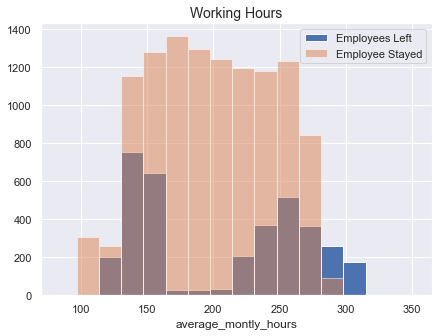

In [27]:
plt.figure(figsize =(7,5))
bins = np.linspace(80,315, 15)
plt.hist(df[df['left']==1]['average_montly_hours'], bins=bins, alpha=1, label='Employees Left')
plt.hist(df[df['left']==0]['average_montly_hours'], bins=bins, alpha = 0.5, label = 'Employee Stayed')
plt.title('Working Hours', fontsize=14)
plt.xlabel('average_montly_hours')
plt.xlim((70,365))
plt.legend(loc='best');

Again, there are 2 groups of employees. A group that works fewer hours and another that works more hours compared to the average hours worked.

number_project
2    160.342546
3    197.507522
4    205.122108
5    212.061572
6    238.694208
7    276.078125
Name: average_montly_hours, dtype: float64


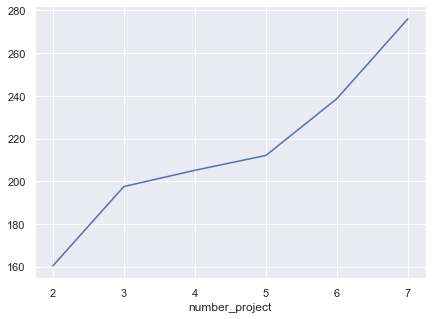

In [28]:
groupby_number_projects = df.groupby('number_project').mean()
groupby_number_projects = groupby_number_projects['average_montly_hours']
print(groupby_number_projects)
plt.figure(figsize=(7,5))
groupby_number_projects.plot();

In [29]:
work_less_hours_left = df[(df.average_montly_hours < 200) & (df.number_project == 2) & (df.left == 1)]
print('work_less_hours_left:',len(work_less_hours_left))

work_more_hours_left = df[(df.average_montly_hours > 240) & (df.number_project >=5 ) & (df.left == 1)]
print('work_more_hours_left:',len(work_more_hours_left))

work_less_hours_left: 1535
work_more_hours_left: 1225


**With the information above the employees that left the company are grouped as:**

    1. Employees with 2 projects and worked less than the average of the company.
    2.Employees with 5 or more projects that worked at least 20% more than the average.

#### Satisfaction Level

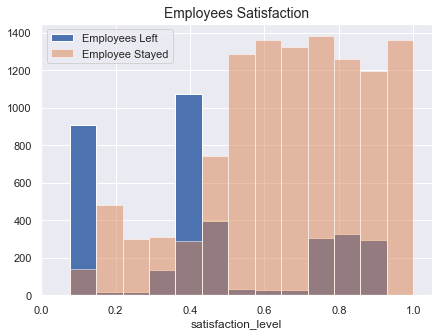

In [30]:
plt.figure(figsize =(7,5))
bins = np.linspace(0.006,1.000, 15)
plt.hist(df[df['left']==1]['satisfaction_level'], bins=bins, alpha=1, label='Employees Left')
plt.hist(df[df['left']==0]['satisfaction_level'], bins=bins, alpha = 0.5, label = 'Employee Stayed')
plt.title('Employees Satisfaction', fontsize=14)
plt.xlabel('satisfaction_level')
plt.xlim((0,1.05))
plt.legend(loc='best');

In [31]:
groupby_time_spend = df.groupby('time_spend_company').mean()
groupby_time_spend['satisfaction_level']

time_spend_company
2     0.697078
3     0.626314
4     0.467517
5     0.610305
6     0.603440
7     0.635957
8     0.665062
10    0.655327
Name: satisfaction_level, dtype: float64

**When do the employees become unsatisfied?**

C:\Users\Ochieng\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Ochieng\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


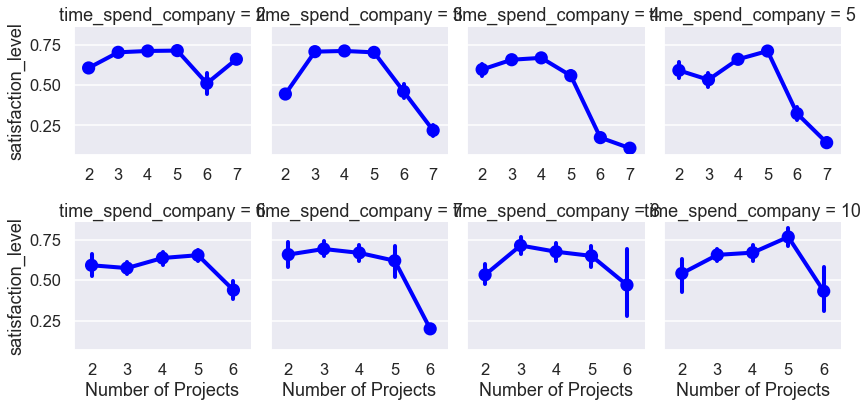

In [32]:
sns.set()
sns.set_context("talk")
ax = sns.factorplot(x="number_project", y="satisfaction_level", col="time_spend_company",col_wrap=4, size=3, color='blue',sharex=False, data=df)
ax.set_xlabels('Number of Projects');

Let´s see why the most valuable employees tend to leave.

From the employees that left with high performance, 4 or more years in the company and working on 5 or more project had:

    1.Low satisfaction level,
    2.Worked more hours,
    3.Haven´t been promoted in the last five years.

C:\Users\Ochieng\AppData\Local\Temp/ipykernel_15084/3458797889.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr2, dtype=np.bool)


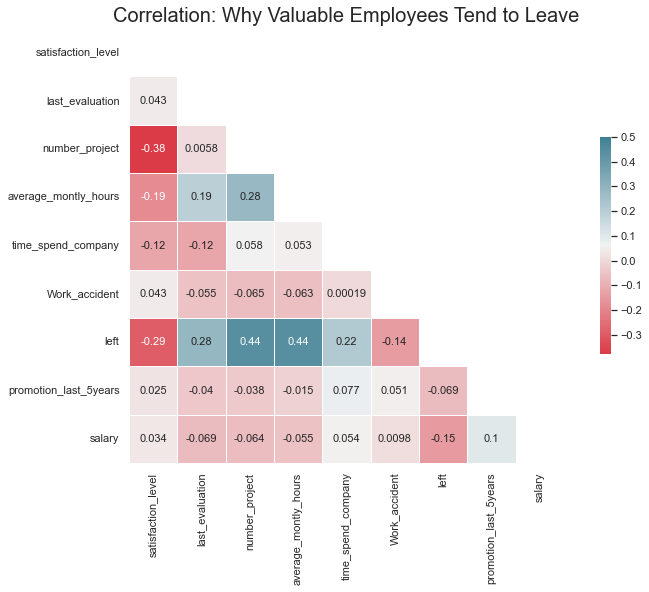

In [33]:
func_living = df[(df.last_evaluation >= 0.70) | (df.time_spend_company >=4) | (df.number_project >= 5)]

corr2 = func_living.corr()

sns.set(style='white')

mask = np.zeros_like(corr2, dtype=np.bool)

mask[np.triu_indices_from(mask)] = True

# Insert the graphic
f, ax = plt.subplots(figsize=(13,8))

cmap = sns.diverging_palette(10,220, as_cmap=True)

#Draw heat map mask
ax = sns.heatmap(corr2, mask=mask, cmap=cmap, vmax= .5, annot=True, annot_kws= {'size':11}, square=True, xticklabels=True, yticklabels=True, linewidths=.5, 
           cbar_kws={'shrink': .5}, ax=ax)
ax.set_title('Correlation: Why Valuable Employees Tend to Leave', fontsize=20);

**Summary of the Exploratory Data Analysis**

    i.It is a relatively young company, on average, employees have 3 or 4 years in the company and the oldest employees are working 10 years.
    
    ii.The biggest difference in the salary from who stayed and those who left, was found in the managemnet department, in the other departments although the salaries of who stayed are higher in average, it is not a big difference.
    
    iii.The number of employees that had a work accident is about 14%, of which only 169 employees left the company, so doesn't seem to have a correlation with the employees leaving.
    
    iv. In five years only 2% of the employees were promoted. Is possible that many employees get unmotivated and start planning to leave.
    
    v. Employees with 7years or longer in the company didn't leave. Employees with less than 5 years have more chances are likely to leave.
    
    vi.There are 2 distincts groups of employees performance that left. A group with poor performance with 2 projects and others with high performance with 5 or more projects. It is not necessary to retain all the employees, the focus is on keeping employees with high performance.
    
    vii.The employees with 4 years in the company have the lowest average satisfaction level of all the company with (0.47).
    
    viii. The satisfaction drops when the employees are working in 5 or more projects. A number of 3 or 4 projects seems to be ideal independent of the time spend in the company.
    
    ix.The employees with 5 or more projects that left also worked at least 20% more hours than the average of the company.
    
    x.The satisfaction level of the employees that left is grouped in totally disappointed, below the average satisfaction and satisfied.